#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>



**Name**: Saar Buchnik

**Student ID**: 305248361

**Date**: April 1st, 2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


## Problem 1 - Solution

----

### Part 1.1

$Z_i \sim \Ncal(\mu_i, 1)$ for $1 \leq i \leq 9$. 

We know that for (any) 2 **normal random variables** - $X,Y$, if $cov(X, Y) = 0$, then $X$ and $Y$ are independent.  
Since the covariance matrix of $Z$ is $I_9$,   
(1) For $i \neq j, 1 \leq i,j \leq 9$: $cov(Z_i,Z_j) = 0$  
(2) For $i = j, 1 \leq i,j \leq 9$: $cov(Z_i,Z_j) = 1$ 
Thus  
(3) **$Z_i$ and $Z_j$ are independent.**

We also know that the sum of **independent normal random variables** is a random normal variable.  
So from (3) we get that:  
(4) $Z_1+Z_2+Z_3+Z_4$ and $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ are random normal variables.

We remember that for random variables $A,B,C,D$:  
(5) $cov(A+B,C+D) = cov(A, C) + cov(A, D) + cov(B, C)+ cov(B, D)$

Now, from (1),(2) and (5) we get:
* $
cov(Z_1+Z_2+Z_3+Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = \\
cov(Z_1, Z_1) + cov(Z_2, Z_2) - cov(Z_3, Z_3) - cov(Z_4, Z_4) = \\
var(Z_1) + var(Z_2) - var(Z_3) - var(Z_4) = \\
1 + 1 - 1 - 1 = 0
$  
(From (1), all the $cov(Z_i,Z_j), i \neq j$ are zero).
* So we got:  
  (6) $cov(Z_1+Z_2+Z_3+Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 0$

Now, from (4), (5) and (6) we can deduce that:  
$Z_1+Z_2+Z_3+Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ are random normal varoables with covariance 0, and thus they are independent.

### Part 1.2

We know from the lectures that an affine transformation of a normal vector is a normal vector.  
Thus, $X=AZ, Y=BZ$ are normal vectors.

So for $X,Y$ to be independent we need thei covariance to be 0:  
$
cov(X,Y) = 0 \\
cov(AZ,BZ) = 0 \\
Acov(Z,Z)B^T = 0 \\
A \Sigma_Z B^T = 0 \\
A I_n B^T = 0 \\
A B^T = 0
$

Thus, for $X,Y$ to be independent, we will require: $A B^T = 0$

### Part 1.3

* $\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}$ are not independent.  
  Proof:  
  If $\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}$ are independent, then they covariance should be zero.  
  
  $
  cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}) =
  cov\left( \frac{1}{J} (Z_{i1}+Z_{i2}+...+Z_{iJ}) , \frac{1}{I} (Z_{1j}+Z_{2j}+...+Z_{Ij}) \right)
  $
  
  As all $Z_{ij}$ are independent of each other, all the covariances zero out, and there is ony one common variable between the 2 sums:  
  $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}) = \frac{1}{IJ} cov(Z_{ij}, Z_{ij}) = \frac{1}{IJ} var(Z_{ij}) = \frac{1}{IJ} \cdot 1 = \frac{1}{IJ} \neq 0$

* $\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}$ are independent.  
  Proof:  
  $\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}$ are sums of independent normal variables, and thus, they are normal variables by themselves.  
  We can show that their covariance is 0, and this will prove they are also independent.  
  And indeed:  
  
  $
  cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) =
  cov\left( \frac{1}{J} (Z_{11}+Z_{12}+...+Z_{1J}) , \frac{1}{J} (Z_{21}+Z_{22}+...+Z_{2J}) \right)
  $  
  
  As all $Z_{ij}$ are independent of each other, all the covariances zero out, and there is no common variable between the 2 sums, thus:  
  $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$

* $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ are independent.  
  Proof:  
  As in the previous sections,
  $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ are sums of independent normal variables, 
  and thus, they are normal variables by themselves.  
  So we can show that their covariance is 0, and this will prove they are also independent. 
  
  $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet} = \frac{1}{IJ} \sum_{j=1}^J \sum_{k=1, k \neq i}^I Z_{kj}$  
  $\bar{Z}_{i\bullet} = \frac{1}{J} \sum_{j=1}^J Z_{ij}$
  
  Thus:  
  $
  cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) 
  = 
  \frac{1}{IJ^2} cov(\sum_{j=1}^J \sum_{k=1, k \neq i}^I Z_{kj}, \sum_{j=1}^J Z_{ij})
  $
  
   As all $Z_{ij}$ are independent of each other, all the covariances zero out, and there is no common variable between the 2 sums, thus:  
  $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 0$

### Part 1.4

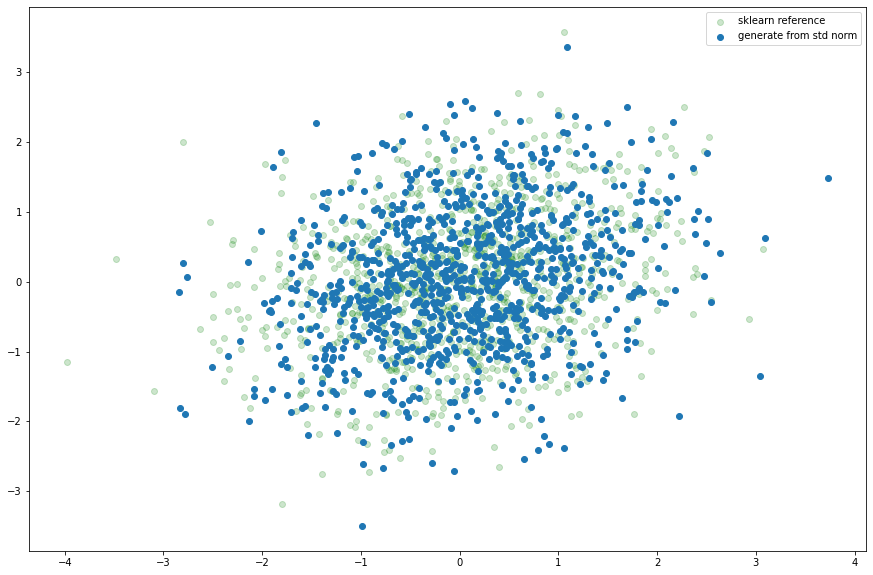

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

random_seed = 42
np.random.seed(random_seed)
N = 1000
sigma = np.asarray([[1, 0.25], [0.25, 1]])

# Build B needed for transformation
B = np.asarray([[0, 1], [np.sqrt(1-0.25**2), 0.25]])
Bt = B.T

assert (
    np.allclose(
        B @ Bt,
        sigma
    )
)

# Generate Nx2 standard normal samples
Y = np.random.randn(1000,2)

# Apply the affine transformation
U = Y @ B

# get from scipy for comparison
distr = multivariate_normal(
    cov = sigma, 
    mean = np.array([0,0])
)
U_skl = distr.rvs(size = N)

# Plot
U0 = U[:, 0]
U1 = U[:, 1]

plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(U_skl[:, 0], U_skl[:, 1], color="green", alpha=0.2, label="sklearn reference")
plt.scatter(U0, U1, label="generate from std norm")
plt.legend()
plt.show()

### Part 1.5

In [2]:
##########################################
### Part A
##########################################
sigma_inv = np.linalg.inv(sigma)
sigma_det = np.linalg.det(sigma)
scaler = 1 / (2 * np.pi * np.sqrt(abs(sigma_det)))

xy = []
min_x = 0
max_x = 1

dx = (max_x - min_x) / N
dy = (2 * max_x - 2 * min_x) / N

for i in range(N+1):
    x = min_x + dx * i

    y_range = int(2 * x // dy)
    for j in range(y_range+1):
        y = dy * j
        xy.append((x, y))


xy = np.asarray(xy)

exp_powers = -0.5 * ((xy @ sigma_inv) * xy).sum(axis=1)
exps = scaler * np.exp(exp_powers)
exps_sum = exps.sum() * dx * dy
prob_A = exps_sum

print(f"By evaluating the integral over the Gaussian density function, we get the probability:\n  Prob={prob_A}")

By evaluating the integral over the Gaussian density function, we get the probability:
  Prob=0.1080689089671176


In [3]:
##########################################
### Part B
##########################################
total = len(U)

idxs = np.where(
    np.logical_and(
        np.logical_and(U0>=0, U0<=1),
        np.logical_and(U1 >= 0, U1 <= 2*U0)
    )
)
U_subspace = U[idxs]
prob_B = len(U_subspace) / len(U)

print(f"By estimating the fraction of samples in 4 that falls in the region A, we get the probability:\n  Prob={prob_B}")

By estimating the fraction of samples in 4 that falls in the region A, we get the probability:
  Prob=0.114


## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

## Problem 2 - Solution

----

### Part 2.1

We can write the joint distribution of X,Y as a multivariate normal:  
$
\begin{bmatrix} Y \\ X \end{bmatrix} 
\sim \Ncal
\left(
\begin{bmatrix} 2 \\ 1 \end{bmatrix}, 
\begin{bmatrix} 2 & 1 \\ 1 & 4 \end{bmatrix}
\right)
$

From the lecture we know that $X|Y=1$ is a gaussian with:
* Mean:  
  $E[X|Y=1] = 1 + 1 \cdot \frac{1}{2} \cdot (1 - 2) = 0.5$
* Variance:  
  $Var[X|Y=1] = 4 - 1 \cdot \frac{1}{2} \cdot 1 = 3.5$

To sum up:  
$X|Y=1 \sim \Ncal(\mu=0.5, \sigma^2 = 3.5)$


### Part 2.2

We can re-order the normal vector:  
$
\begin{bmatrix}
Z \\
X \\
Y
\end{bmatrix} 
\sim 
\Ncal
\left( 
\begin{bmatrix} 
3 \\
1 \\
2
\end{bmatrix}, 
\begin{bmatrix}
 8 & 3 & 3 \\
 3 & 4 & 1 \\
 3 & 1 & 2
\end{bmatrix}
\right)
$

And now from class we know that the joint ditsribution of $X,Y$ given Z is a multivariate normal with:
* Mean:  
  $
  E \left[ \begin{bmatrix} X \\ Y \end{bmatrix} \middle| Z=1 \right]  
  = 
  \begin{bmatrix} 1 \\ 2 \end{bmatrix} + 
  \begin{bmatrix} 3 \\ 3 \end{bmatrix} \frac{1}{8} (1-3)
  =
  \begin{bmatrix} 1 - \frac{3}{4} \\ 2 - \frac{3}{4} \end{bmatrix} 
  = 
  \begin{bmatrix} 0.25 \\ 1.25 \end{bmatrix}
  $

* Variance:  
  $
  Var \left[ \begin{bmatrix} X \\ Y \end{bmatrix} \middle| Z=1 \right] 
  = 
  \begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix} -
  \begin{bmatrix} 3 \\ 3 \end{bmatrix} \frac{1}{8} \begin{bmatrix} 3 & 3 \end{bmatrix}
  =
  \begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix} - \frac{1}{8} \begin{bmatrix} 9 & 9 \\ 9 & 9 \end{bmatrix}
  =
  \begin{bmatrix} 2.875 & -0.125 \\ -0.125 & 0.875 \end{bmatrix}
  $

To sum up:  
$\left[ \begin{bmatrix} X \\ Y \end{bmatrix} \middle| Z=1 \right] 
\sim 
\Ncal
\left(
\begin{bmatrix} 0.25 \\ 1.25 \end{bmatrix}, 
\begin{bmatrix} 2.875 & -0.125 \\ -0.125 & 0.875 \end{bmatrix}
\right)
$

### Part 2.3

We can re-order the normal vector:  
$
\begin{bmatrix}
X \\
Z \\
Y
\end{bmatrix} 
\sim 
\Ncal
\left( 
\begin{bmatrix}
1 \\
3 \\
2
\end{bmatrix}, 
\begin{bmatrix}
 4 & 3 & 1 \\
 3 & 8 & 3 \\
 1 & 3 & 2
\end{bmatrix}
\right)
$

And now from class we know that the ditsribution of $Y$ given X,Z is a normal with:
* Mean:  
  $
  E \left[ Y \middle| \begin{bmatrix} X=3 \\ Z=2 \end{bmatrix} \right]  
  = 
  2 + 
  \begin{bmatrix} 1 & 3 \end{bmatrix}
  \begin{bmatrix} 4 & 3 \\ 3 & 8 \end{bmatrix}^{-1}
  (\begin{bmatrix} 3 \\ 2 \end{bmatrix} - \begin{bmatrix} 1 \\ 3 \end{bmatrix})
  =
  2 +
  \begin{bmatrix} 1 & 3 \end{bmatrix}
  \frac{1}{23} \begin{bmatrix} 8 & -3 \\ -3 & 4 \end{bmatrix}
  \begin{bmatrix} 2 \\ -1 \end{bmatrix}
  =
  2 + \frac{1}{23}(-11) 
  = 
  1.5217
  $

* Variance:  
  $
  Var \left[ Y \middle| \begin{bmatrix} X=3 \\ Z=2 \end{bmatrix} \right]  
  = 
  2 -
  \begin{bmatrix} 1 & 3 \end{bmatrix}
  \begin{bmatrix} 4 & 3 \\ 3 & 8 \end{bmatrix}^{-1}
  \begin{bmatrix} 1 \\ 3 \end{bmatrix}
  =
  2 -
  \begin{bmatrix} 1 & 3 \end{bmatrix}
  \frac{1}{23} \begin{bmatrix} 8 & -3 \\ -3 & 4 \end{bmatrix}
  \begin{bmatrix} 1 \\ 3 \end{bmatrix}
  =
  2-\frac{1}{23} \cdot 26
  =
  0.8696
  $

To sum up:  
$Y|X=3,Z=2 \sim \Ncal(\mu=1.5217, \sigma^2 = 0.8696)$

### Part 2.4

In part 2.3 we showed that $Y|X=3,Z=2$ is a normal random variable with $\mu=1.5217, \sigma^2 = 0.8696$.

Thus:  
$Pr(-1 \leq Y \leq 1 |X=3,Z=2) = CDF_Y(1) - CDF_Y(-1) = 0.2845$
* See calculation for the last step in the code below. 


In [4]:
import numpy as np
from scipy.stats import norm

mu= 2 - (11/23)
sigma_sqr = 2 - (26/23)
sigma = np.sqrt(sigma_sqr)

print(f"mu={mu:.4f}")
print(f"sigma_sqr={sigma_sqr:.4f}")
print(f"sigma={sigma:.4f}")

Y = norm(loc=mu, scale=sigma)
prob = Y.cdf(1) - Y.cdf(-1)

print(f"P(-1<Y<1) = {prob:.4f}")

mu=1.5217
sigma_sqr=0.8696
sigma=0.9325
P(-1<Y<1) = 0.2845


## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [ ]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [ ]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>